In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [60]:
df=pd.read_csv('heart1.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [61]:
df.shape

(303, 14)

Observation:dataset has 200 rows and 13 columns

In [62]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

age: age in years
sex: sex (1 = male; 0 = female)
cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the 
        hospital)
chol: serum cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
thalach: maximum heart rate achieved
exang:exercise induced angina (1 = yes; 0 = no)
oldpeak = ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
ca: number of major vessels (0-3) colored by flourosopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
num: diagnosis of heart disease (angiographic disease status)
        -- Value 0:
        -- Value 1:
           Value 2: 
           Value 3:

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Observation: all columns are datatype int except old peak is in float

In [65]:
df['target'].unique()
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [66]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Observation:
    Age-Min 29 and max 77
    chol min-126 and max is 564
    Difference between 75% and max is greater for trestbps,chol,thalach-data might have outliers
    mean is greater than median for trestbps,cholthalach data can be skewed

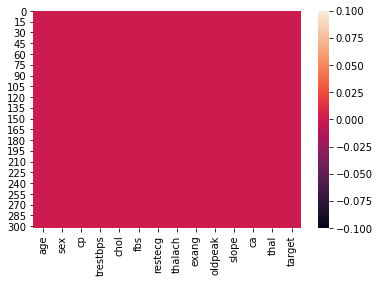

In [67]:
#No null value present 
sns.heatmap(df.isnull())

Observation:No null values present

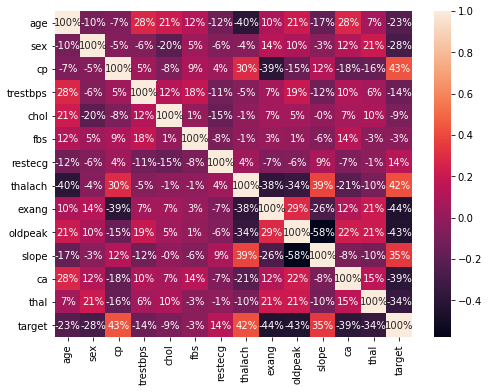

In [68]:
#Correlation 
dfcor=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(dfcor,annot=True,fmt='.0%')

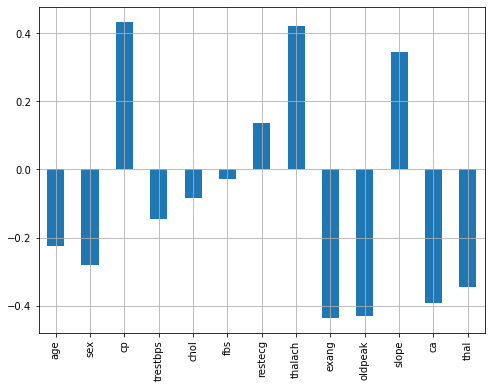

In [69]:
plt.figure(figsize=(8,6))
df.drop('target',axis=1).corrwith(df['target']).plot(kind='bar',grid=True)

Observation:cp,thalach and slope are highly postively correlated
            exang,oldpeak,ca,thal,sex and age are highly negatively correlated
            trestbps,chol,fbs are slightly negatively correlated

In [70]:
#Skew
df.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trestbps    0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalach    -0.537410
exang       0.742532
oldpeak     1.269720
slope      -0.508316
ca          1.310422
thal       -0.476722
target     -0.179821
dtype: float64

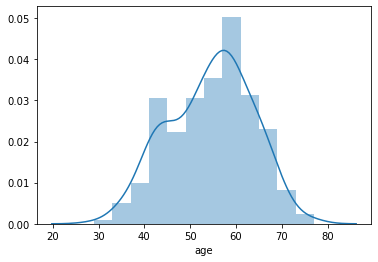

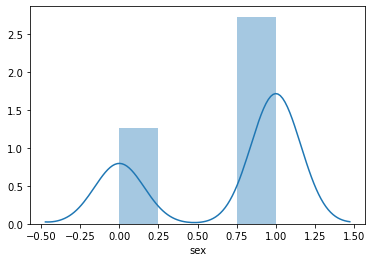

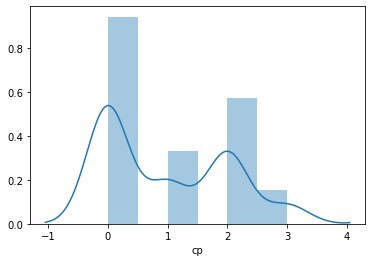

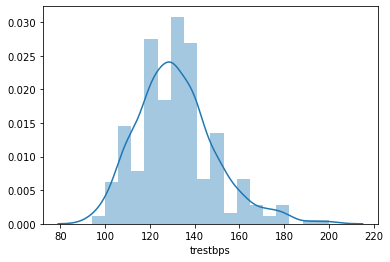

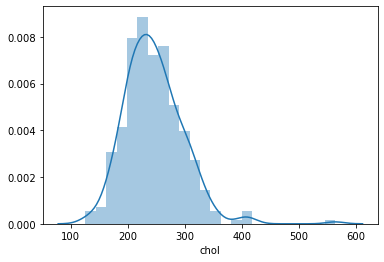

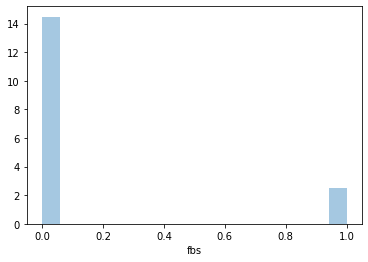

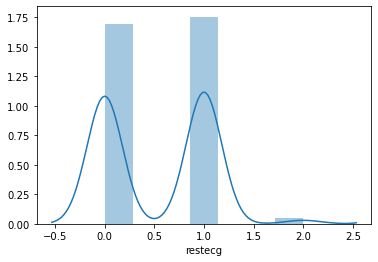

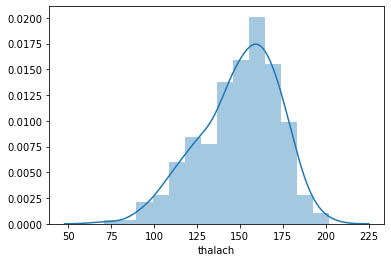

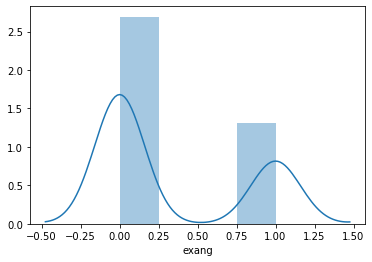

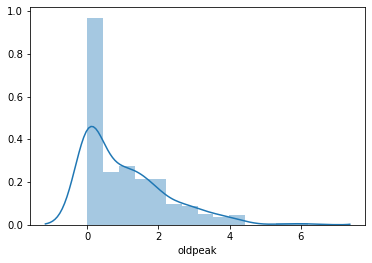

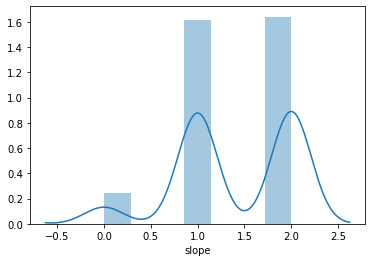

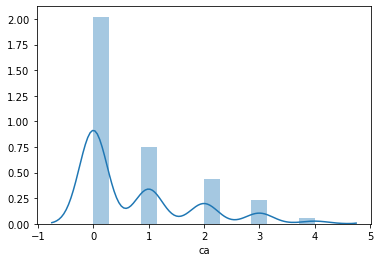

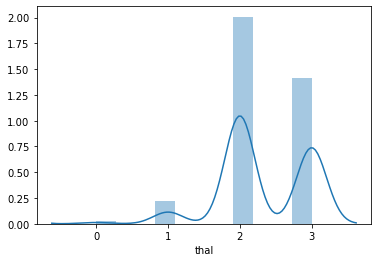

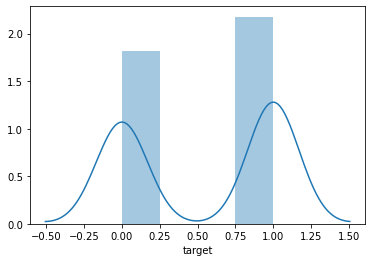

In [71]:
#Oldpeak and slope-right skewed
collist=df.columns.values
ncol=10
nrow=20
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

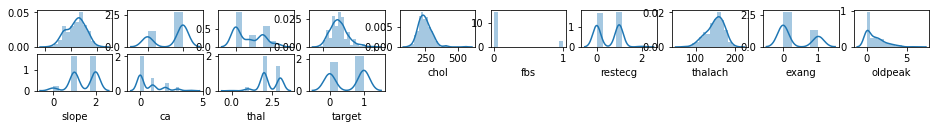

In [72]:
plt.figure(figsize=(16,16))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[collist[i]])

age            AxesSubplot(0.125,0.536818;0.0731132x0.343182)
sex         AxesSubplot(0.212736,0.536818;0.0731132x0.343182)
cp          AxesSubplot(0.300472,0.536818;0.0731132x0.343182)
trestbps    AxesSubplot(0.388208,0.536818;0.0731132x0.343182)
chol        AxesSubplot(0.475943,0.536818;0.0731132x0.343182)
fbs         AxesSubplot(0.563679,0.536818;0.0731132x0.343182)
restecg     AxesSubplot(0.651415,0.536818;0.0731132x0.343182)
thalach     AxesSubplot(0.739151,0.536818;0.0731132x0.343182)
exang       AxesSubplot(0.826887,0.536818;0.0731132x0.343182)
oldpeak           AxesSubplot(0.125,0.125;0.0731132x0.343182)
slope          AxesSubplot(0.212736,0.125;0.0731132x0.343182)
ca             AxesSubplot(0.300472,0.125;0.0731132x0.343182)
thal           AxesSubplot(0.388208,0.125;0.0731132x0.343182)
target         AxesSubplot(0.475943,0.125;0.0731132x0.343182)
dtype: object

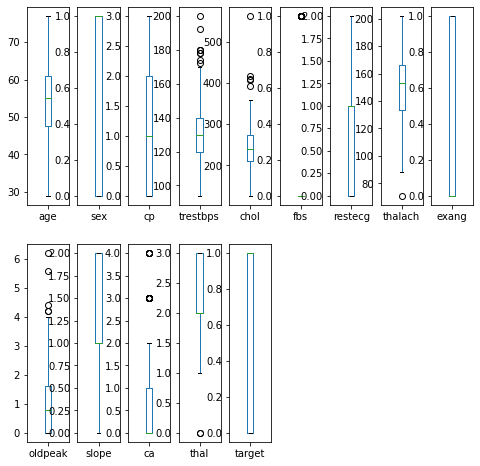

In [73]:
# Outliers are present 
df.plot(kind='box',subplots=True,layout=(2,9),figsize=(8,8))

In [74]:
#all values are 0
new=df.drop(["ca"],axis=1) 

In [75]:
#Remove Outliers
from scipy.stats import zscore
z=np.abs(zscore(new))
threshold=3
print(np.where(z>3))
df_new=new[(z<3).all(axis=1)]
df_new

(array([ 28,  48,  85, 204, 220, 221, 223, 246, 248, 272, 281], dtype=int64), array([ 4, 11,  4,  9,  4,  9,  3,  4,  3,  7, 11], dtype=int64))


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,3,0


In [76]:
print(df.shape) #dataset
print(new.shape) #removed ca column
print(df_new.shape) #Removed Outliers

(303, 14)
(303, 13)
(292, 13)


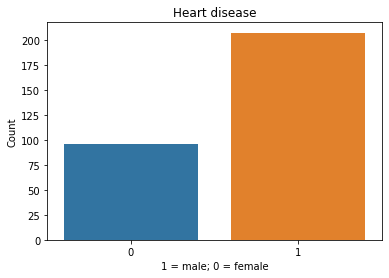

1    207
0     96
Name: sex, dtype: int64


In [89]:
#Visualization
sns.countplot(x="sex",data=df)
plt.title("Heart disease")
plt.xlabel("1 = male; 0 = female")
plt.ylabel("Count")
plt.show()
print(df.sex.value_counts())

Observation: male number is 207 and female number is 96

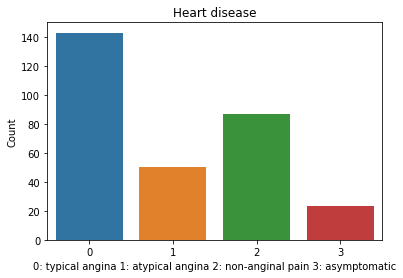

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


In [90]:
sns.countplot(x="cp",data=df)
plt.title("Heart disease")
plt.xlabel("0: typical angina 1: atypical angina 2: non-anginal pain 3: asymptomatic")
plt.ylabel("Count")
plt.show()
print(df.cp.value_counts())

Observation: 0 has 143 and 1 has 87, 2 has 50 and 3 has 23. Highest number is for typical angina

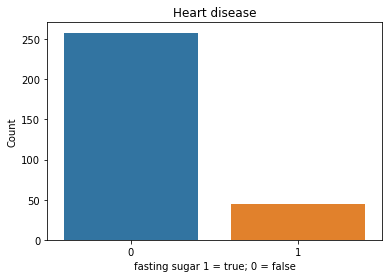

0    258
1     45
Name: fbs, dtype: int64


In [91]:
sns.countplot(x="fbs",data=df)
plt.title("Heart disease")
plt.xlabel("fasting sugar 1 = true; 0 = false")
plt.ylabel("Count")
plt.show()
print(df.fbs.value_counts())

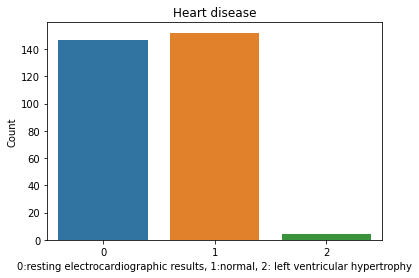

1    152
0    147
2      4
Name: restecg, dtype: int64


In [80]:
sns.countplot(x="restecg",data=df)
plt.title("Heart disease")
plt.xlabel("0:resting electrocardiographic results, 1:normal, 2: left ventricular hypertrophy")
plt.ylabel("Count")
plt.show()
print(df.restecg.value_counts())

Observation: 1 has more number 152 than 0 and 2

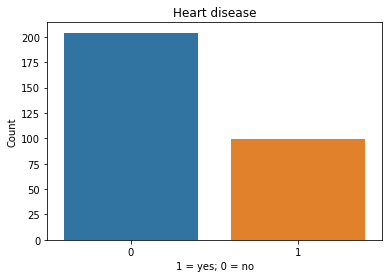

0    204
1     99
Name: exang, dtype: int64


In [81]:
sns.countplot(x="exang",data=df)
plt.title("Heart disease")
plt.xlabel("1 = yes; 0 = no")
plt.ylabel("Count")
plt.show()
print(df.exang.value_counts())

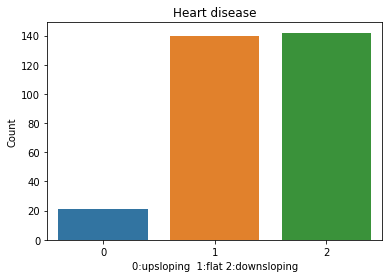

2    142
1    140
0     21
Name: slope, dtype: int64


In [92]:
sns.countplot(x="slope",data=df)
plt.title("Heart disease")
plt.xlabel("0:upsloping  1:flat 2:downsloping")
plt.ylabel("Count")
plt.show()
print(df.slope.value_counts())

Observation:1 and 2 are almost same and compared to 0 upsloping

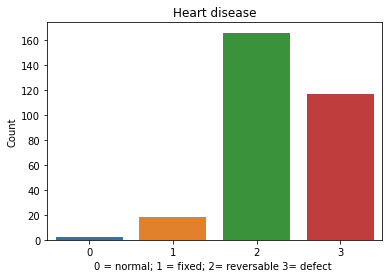

2    166
3    117
1     18
0      2
Name: thal, dtype: int64


In [112]:
sns.countplot(x="thal",data=df)
plt.title("Heart disease")
plt.xlabel("0 = normal; 1 = fixed; 2= reversable 3= defect ")
plt.ylabel("Count")
plt.show()
print(df.thal.value_counts())

Observation: 2 is having more number when compared to 0,1 and 3

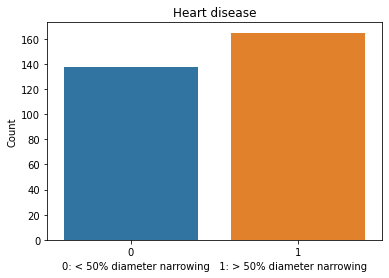

1    165
0    138
Name: target, dtype: int64


In [147]:
sns.countplot(x="target",data=df)
plt.title("Heart disease")
plt.ylabel("Count")
plt.xlabel( '0: < 50% diameter narrowing   1: > 50% diameter narrowing')
plt.show()
print(df.target.value_counts())

Observation: 165 are chances of having heart disease and 138 not having chances of heart disease

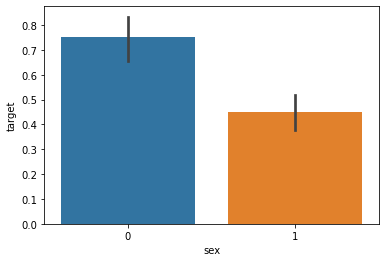

In [144]:
sns.barplot(y="target",x="sex",data=df)

Observation: More number of female are likely to have heart diease when compared to male

target  cp
0       0     104
        2      18
        1       9
        3       7
1       2      69
        1      41
        0      39
        3      16
Name: cp, dtype: int64


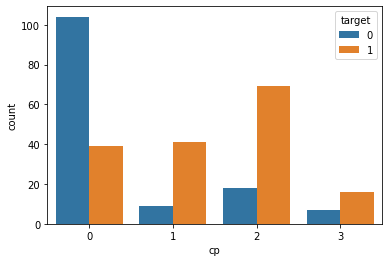

In [104]:
sns.countplot(hue="target",x="cp",data=df)
print(df.groupby('target')['cp'].value_counts())

Obseravtion:
    50% < diameter narrowing is high with cp type 0, when compared to 1,2,3
    50% > diameter narrowing is high with cp type 1,when compared to 0,2,3

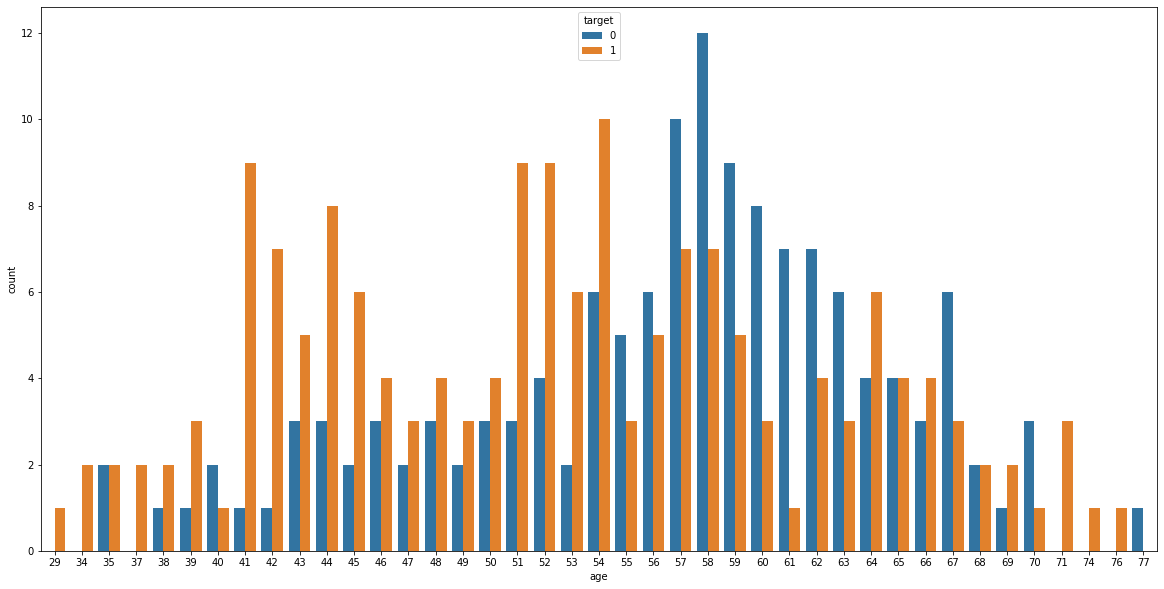

In [101]:
fig=plt.figure(figsize=(20,10))
sns.countplot('age', hue='target', data=df)
plt.show()

Observation: More chances of heart disease for age 57,58,59

target  fbs
0       0      116
        1       22
1       0      142
        1       23
Name: fbs, dtype: int64


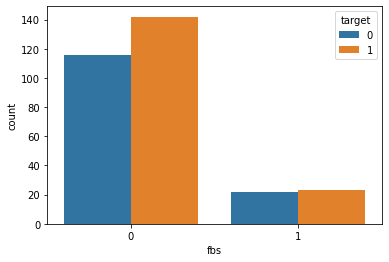

In [105]:
sns.countplot(hue="target",x="fbs",data=df)
print(df.groupby('target')['fbs'].value_counts())

In [ ]:
Obseravtion:
    More chances of heart diease when fbs is 1
    50% > diameter narrowing is high with cp type 1,when compared to 0,2,3

target  restecg
0       0          79
        1          56
        2           3
1       1          96
        0          68
        2           1
Name: restecg, dtype: int64


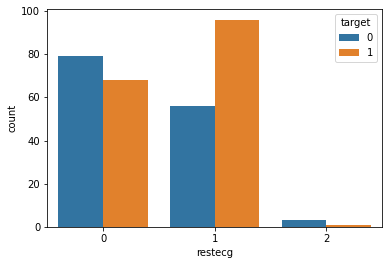

In [107]:
sns.countplot(hue="target",x="restecg",data=df)
print(df.groupby('target')['restecg'].value_counts())

Obseravtion:
    50% < diameter narrowing is high with restecg type 1, when compared to 1,2

<function matplotlib.pyplot.show(*args, **kw)>

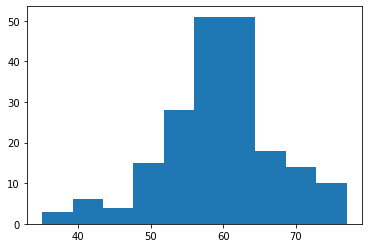

In [54]:
plt.hist(df['age'],bins=10)
plt.show

Observation:Age group is max for 55 to 65

target  exang
0       1         76
        0         62
1       0        142
        1         23
Name: exang, dtype: int64


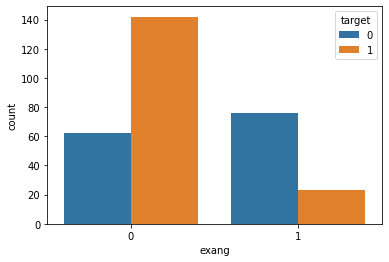

In [108]:
sns.countplot(hue="target",x="exang",data=df)
print(df.groupby('target')['exang'].value_counts())

target  thal
0       3        89
        2        36
        1        12
        0         1
1       2       130
        3        28
        1         6
        0         1
Name: thal, dtype: int64


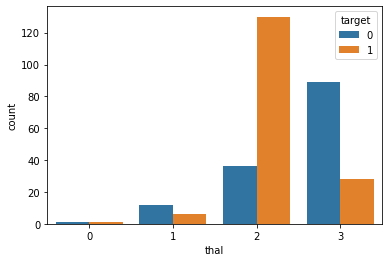

In [109]:
sns.countplot(hue="target",x="thal",data=df)
print(df.groupby('target')['thal'].value_counts())

Obseravtion:
    More chances of heart disease for thal type 2,when compared to 0,1,3

target  slope
0       1         91
        2         35
        0         12
1       2        107
        1         49
        0          9
Name: slope, dtype: int64


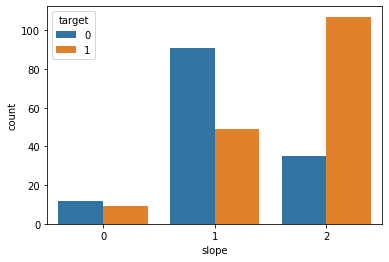

In [110]:
sns.countplot(hue="target",x="slope",data=df)
print(df.groupby('target')['slope'].value_counts())

Observation:More chances of heart disease for slope type 2,when compared to 0 and 1

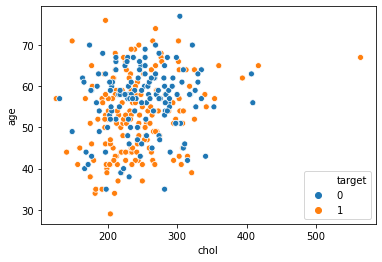

In [153]:
sns.scatterplot(x='chol', y='age', data=df, hue='target')

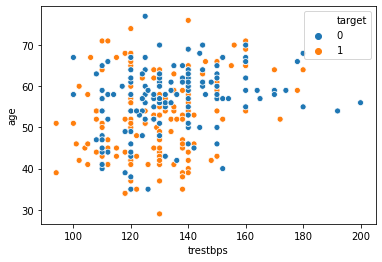

In [154]:
sns.scatterplot(x='trestbps', y='age', data=df, hue='target')

In [117]:
df_x=df_new.drop(columns=['target'])
y=pd.DataFrame(df_new['target'])
x=pd.DataFrame(df_x)

In [118]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x,columns=df_x.columns)

In [119]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [120]:
print(x_train.shape, '\t', x_test.shape)
print(y_train.shape, '\t', y_test.shape)

(204, 12) 	 (88, 12)
(204, 1) 	 (88, 1)


In [159]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LogisticRegression
model=[LogisticRegression(),DecisionTreeClassifier(),GaussianNB(),KNeighborsClassifier(),SVC(),AdaBoostClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    print(m.fit(x_train,y_train))
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("accuracy score",accuracy_score(y_test,predm))
    print("confusion matrix",confusion_matrix(y_test,predm))
    print("classification report",classification_report(y_test,predm))
    print("*********************************************")
    print("\n")

LogisticRegression()
accuracy score 0.8409090909090909
confusion matrix [[28  5]
 [ 9 46]]
classification report               precision    recall  f1-score   support

           0       0.76      0.85      0.80        33
           1       0.90      0.84      0.87        55

    accuracy                           0.84        88
   macro avg       0.83      0.84      0.83        88
weighted avg       0.85      0.84      0.84        88

*********************************************


DecisionTreeClassifier()
accuracy score 0.625
confusion matrix [[19 14]
 [19 36]]
classification report               precision    recall  f1-score   support

           0       0.50      0.58      0.54        33
           1       0.72      0.65      0.69        55

    accuracy                           0.62        88
   macro avg       0.61      0.62      0.61        88
weighted avg       0.64      0.62      0.63        88

*********************************************


GaussianNB()
accuracy score 0.818

Observation:
LogisticRegression:84
DecisionTreeClassifier-62
GaussianNB-88
KNeighborsClassifier-89
SVC-85
AdaBoostClassifier-77
RandomForestClassifier-82
GradientBoostingClassifier-81
BaggingClassifier-83

Best model KNN

In [160]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),DecisionTreeClassifier(),GaussianNB(),KNeighborsClassifier(),SVC(),AdaBoostClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]
for m in model:
    m.fit(x_train,y_train)
    svcscores=cross_val_score(m,x,y,cv=5,scoring='accuracy')
    print(m)
    print('score',svcscores)
    print('mean score',svcscores.mean(),'std',svcscores.std())
    print('***********************************************************')

LogisticRegression()
score [0.79661017 0.84745763 0.77586207 0.81034483 0.77586207]
mean score 0.8012273524254822 std 0.026564940202326814
***********************************************************
DecisionTreeClassifier()
score [0.66101695 0.69491525 0.75862069 0.70689655 0.70689655]
mean score 0.7056691992986558 std 0.03135711688412358
***********************************************************
GaussianNB()
score [0.77966102 0.86440678 0.79310345 0.84482759 0.77586207]
mean score 0.8115721800116891 std 0.03614428135176204
***********************************************************
KNeighborsClassifier()
score [0.72881356 0.84745763 0.86206897 0.86206897 0.72413793]
mean score 0.8049094097019287 std 0.06427968677352554
***********************************************************
SVC()
score [0.77966102 0.81355932 0.82758621 0.79310345 0.70689655]
mean score 0.7841613091759205 std 0.04200005268553105
***********************************************************
AdaBoostClassifier()
score

In [126]:
#Gridsearch for best parameter
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parameters = {'n_neighbors':[4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}
clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
clf.best_params_

{'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 6}

In [133]:
#KNN as best paramters
knn=KNeighborsClassifier(algorithm='auto', leaf_size= 1, n_jobs= -1, n_neighbors= 6)
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train))
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8382352941176471
0.8636363636363636
[[29  4]
 [ 8 47]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        33
           1       0.92      0.85      0.89        55

    accuracy                           0.86        88
   macro avg       0.85      0.87      0.86        88
weighted avg       0.87      0.86      0.86        88



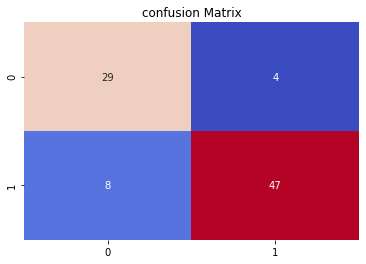

In [135]:
cm=confusion_matrix(y_test,predknn)
sns.heatmap(cm,annot=True,cbar=False,cmap='coolwarm')

plt.title("confusion Matrix")
plt.show()

In [141]:
#AUCROC curve 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob=knn.predict_proba(x_test)[:,1]

0.8666666666666666


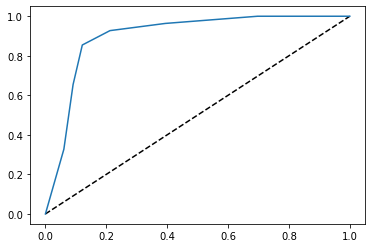

In [138]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LR')

auc_score=roc_auc_score(y_test,knn.predict(x_test))
print(auc_score)

In [142]:
import joblib
joblib.dump(knn,'heartdisease.pkl')

['heartdisease.pkl']